<a href="https://colab.research.google.com/github/ericklyl/RegressaoLinear/blob/main/PYTORCH_LAB2_RegressaoQuadratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial PyTorch:

    2) Regressão Não-Linear

## Importação de Bibliotecas

### Objetivo

Neste notebook, você irá aprender a utilizar o PyTorch para resolver problemas de **regressão linear**, **regressão não linear** e **classificação binária**. Ao final, será capaz de construir modelos simples e interpretar seus resultados.

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Parte 2 – Regressão Não Linear (y = 3x² - 10x + 6)

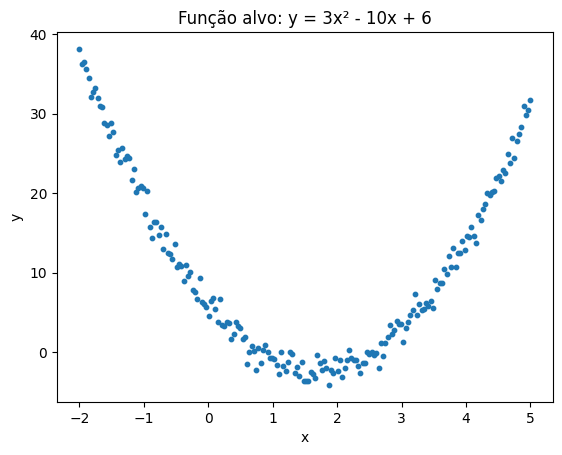

In [2]:
# Dados quadráticos
x = torch.unsqueeze(torch.linspace(-2, 5, 200), dim=1)
y = 3 * x**2 - 10 * x + 6 + 1.0 * torch.randn(x.size())

plt.scatter(x.numpy(), y.numpy(), s=10)
plt.title("Função alvo: y = 3x² - 10x + 6")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [27]:
# Testando com ainda menos neurônios: 4, 2, 1
class RegressaoQuadratica(nn.Module):
    def __init__(self):
        super(RegressaoQuadratica, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 10),
            nn.Tanh(),
            nn.Linear(10, 8),
            nn.Tanh(),
            nn.Linear(8, 1)
        )
    def forward(self, x):
        return self.net(x)

In [28]:
modelo = RegressaoQuadratica()
criterio = nn.MSELoss()
otimizador = torch.optim.Adam(modelo.parameters(), lr=0.01)

for epoca in range(300):
    saida = modelo(x)
    perda = criterio(saida, y)

    otimizador.zero_grad()
    perda.backward()
    otimizador.step()

    if (epoca + 1) % 20 == 0:
        print(f'Época {epoca+1}, Perda: {perda.item():.4f}')

Época 20, Perda: 186.2665
Época 40, Perda: 152.9650
Época 60, Perda: 137.1992
Época 80, Perda: 129.4503
Época 100, Perda: 117.2191
Época 120, Perda: 94.1621
Época 140, Perda: 73.3529
Época 160, Perda: 58.7058
Época 180, Perda: 47.0440
Época 200, Perda: 37.2335
Época 220, Perda: 29.9462
Época 240, Perda: 24.6229
Época 260, Perda: 20.6103
Época 280, Perda: 17.4393
Época 300, Perda: 14.8530


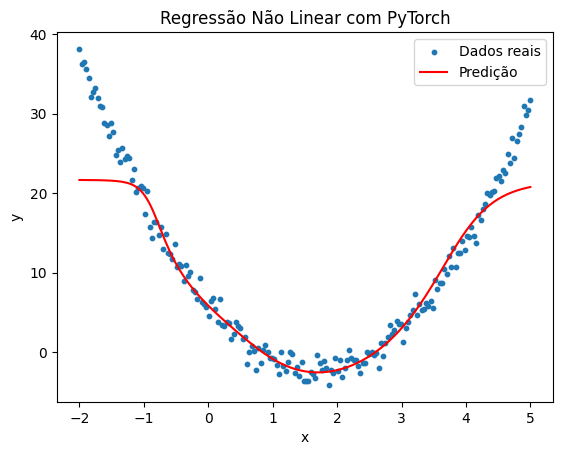

In [29]:
# Visualização dos resultados
plt.scatter(x.numpy(), y.numpy(), s=10, label='Dados reais')
plt.plot(x.numpy(), modelo(x).detach().numpy(), color='red', label='Predição')
plt.legend()
plt.title("Regressão Não Linear com PyTorch")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Exercício 2

a) Altere o número de neurônios em cada camada (ex: `32`, `16`, `1`). Qual o número mínimo que funciona de forma apropriada?
o minimo foi, (10,8,1)

b) Em seguida, troque `ReLU` por `Tanh`. Compare os resultados. O tanh captura bem a forma da parabola porem ele falha ao caputurar os extremos nas pontas da parabola, o modelo é limitado quando recebe valores muito altos ou muito baixos pois ele so da valores de -1 a 1, então mesmo s eo valor for muito grande não vai adiantar pois só vai aumntar entre -1 e 1 por isso ele fica quase plano nas pontas pois mesmo com numero grandes ele mal se move

https://miro.medium.com/v2/resize:fit:1400/0*_-znXJj6VHO-f1bC

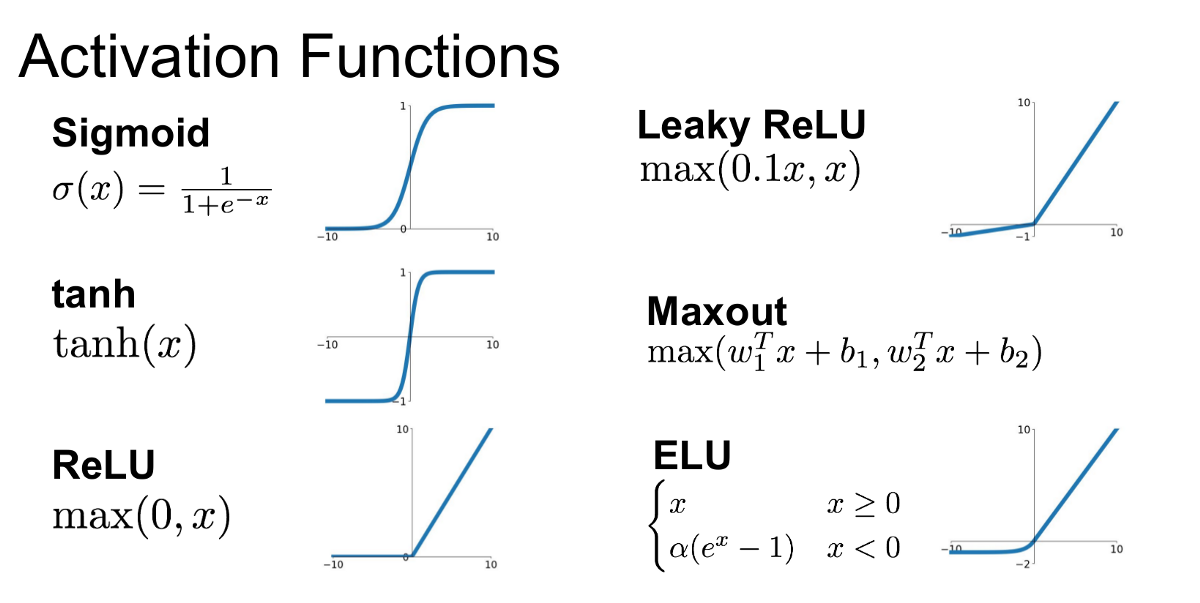

https://i.sstatic.net/ezK5z.jpg

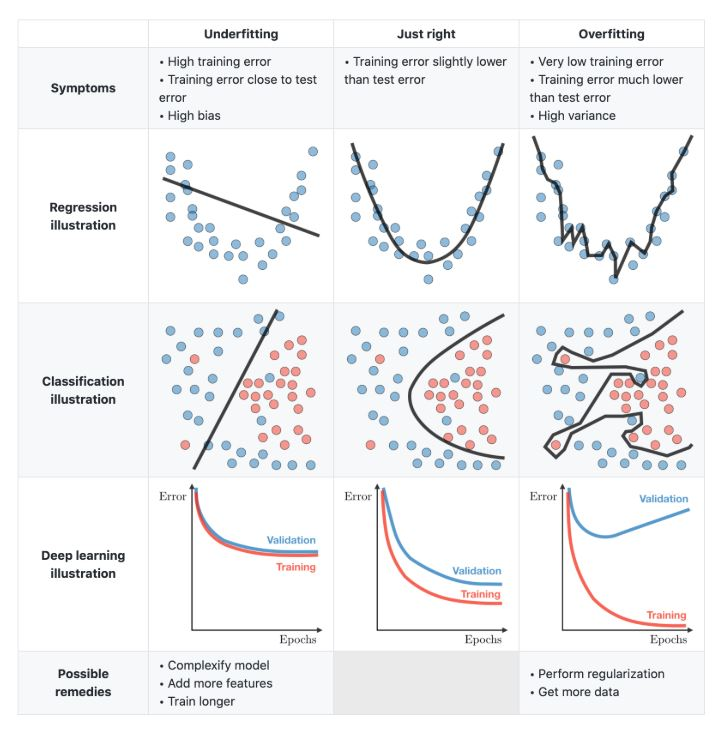